# Look at accelerometer data 

From Jeep and Focus at various speeds over various potholes and storm drain channels.

In [8]:
#Standard Header used on the projects

#first the major packages used for math and graphing
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler
import scipy.special as sp
import pandas as pd

#Custome graph format style sheet
plt.style.use('Prospectus.mplstyle')

#If being run by a seperate file, use the seperate file's graph format and saving paramaeters
#otherwise set what is needed
if not 'Saving' in locals():
    Saving = True
if not 'Titles' in locals():
    Titles = False
if not 'Ledgends' in locals():
    Ledgends = False
if not 'FFormat' in locals():
    FFormat = '.png'
if not 'location' in locals():
    #save location.  First one is for running on home PC, second for running on the work laptop.  May need to make a global change
    #location = 'E:\\Documents\\Dan\\Code\\Prospectus\\Document\\Figures\\'
    #location = 'C:\\Users\\dhendrickson\\Documents\\github\\FigsAndPlots\\FigsAndPlotsDocument\\Figures\\'
    location = 'C:\\Users\\Hendrickson\\Desktop\\Phone Acceleration\\3'

#Standard cycle for collors and line styles
default_cycler = (cycler('color', ['0.00', '0.40', '0.60', '0.70']) + cycler(linestyle=['-', '--', ':', '-.']))
plt.rc('axes', prop_cycle=default_cycler)

In [9]:
#Extra Headers:
import DWFT as fp
import os as os
import pywt as py
import statistics as st
import os as os
import pandas as pd
import random
import multiprocessing
from joblib import Parallel, delayed
from pywt._extensions._pywt import (DiscreteContinuousWavelet, ContinuousWavelet,
                                Wavelet, _check_dtype)
from pywt._functions import integrate_wavelet, scale2frequency
from time import time as ti

my_cmap = plt.get_cmap('gray')

In [10]:
#DataSet = np.genfromtxt(open('./Data/Jeep SD 10.txt','r'), delimiter=',',skip_header=4)
Header = np.array(['T', 'X','Y','Z','R','Theta','Phi'])

fig=plt.figure(figsize=(6.67,3.75))
plt.plot(DataSet[:,0],DataSet[:,1], label = 'X')
plt.plot(DataSet[:,0],DataSet[:,2], label = 'Y')
plt.plot(DataSet[:,0],DataSet[:,3], label = 'Z')
plt.plot(DataSet[:,0],DataSet[:,4], label = 'R')

title = '4 Magnitude Acceleration Curves'
if Ledgends: plt.legend()
if Titles: plt.title(title)
if Saving: plt.savefig(location+title.replace(" ", "").replace(":", "").replace(",", "")+FFormat)
plt.show()

In [24]:
def PlotFingerPrint(data, xName='a', title='', FP='mexh',scales = 50, slices=10, trim=0):
    
    #FpScat=fp.getLabeledThumbprint(data, FP,scales,slices)
    
    if xName == 'a':
        xName = np.arange(0,np.shape(data)[0]-2*trim,1)
    Al,Ms  = np.meshgrid(xName,np.linspace(1,scales,scales))

    fig1 = plt.figure(figsize=(6.67,3.75))
    ax1 = plt.axes()
    cs1 = ax1.contourf(Al,Ms, data[:,trim:-trim],cmap=my_cmap,levels=slices)

    if Titles: plt.title(title)
    if Saving: plt.savefig(location+title.replace(" ", "").replace(":", "").replace(",", "").replace(".txt","")+FFormat)

    plt.show()

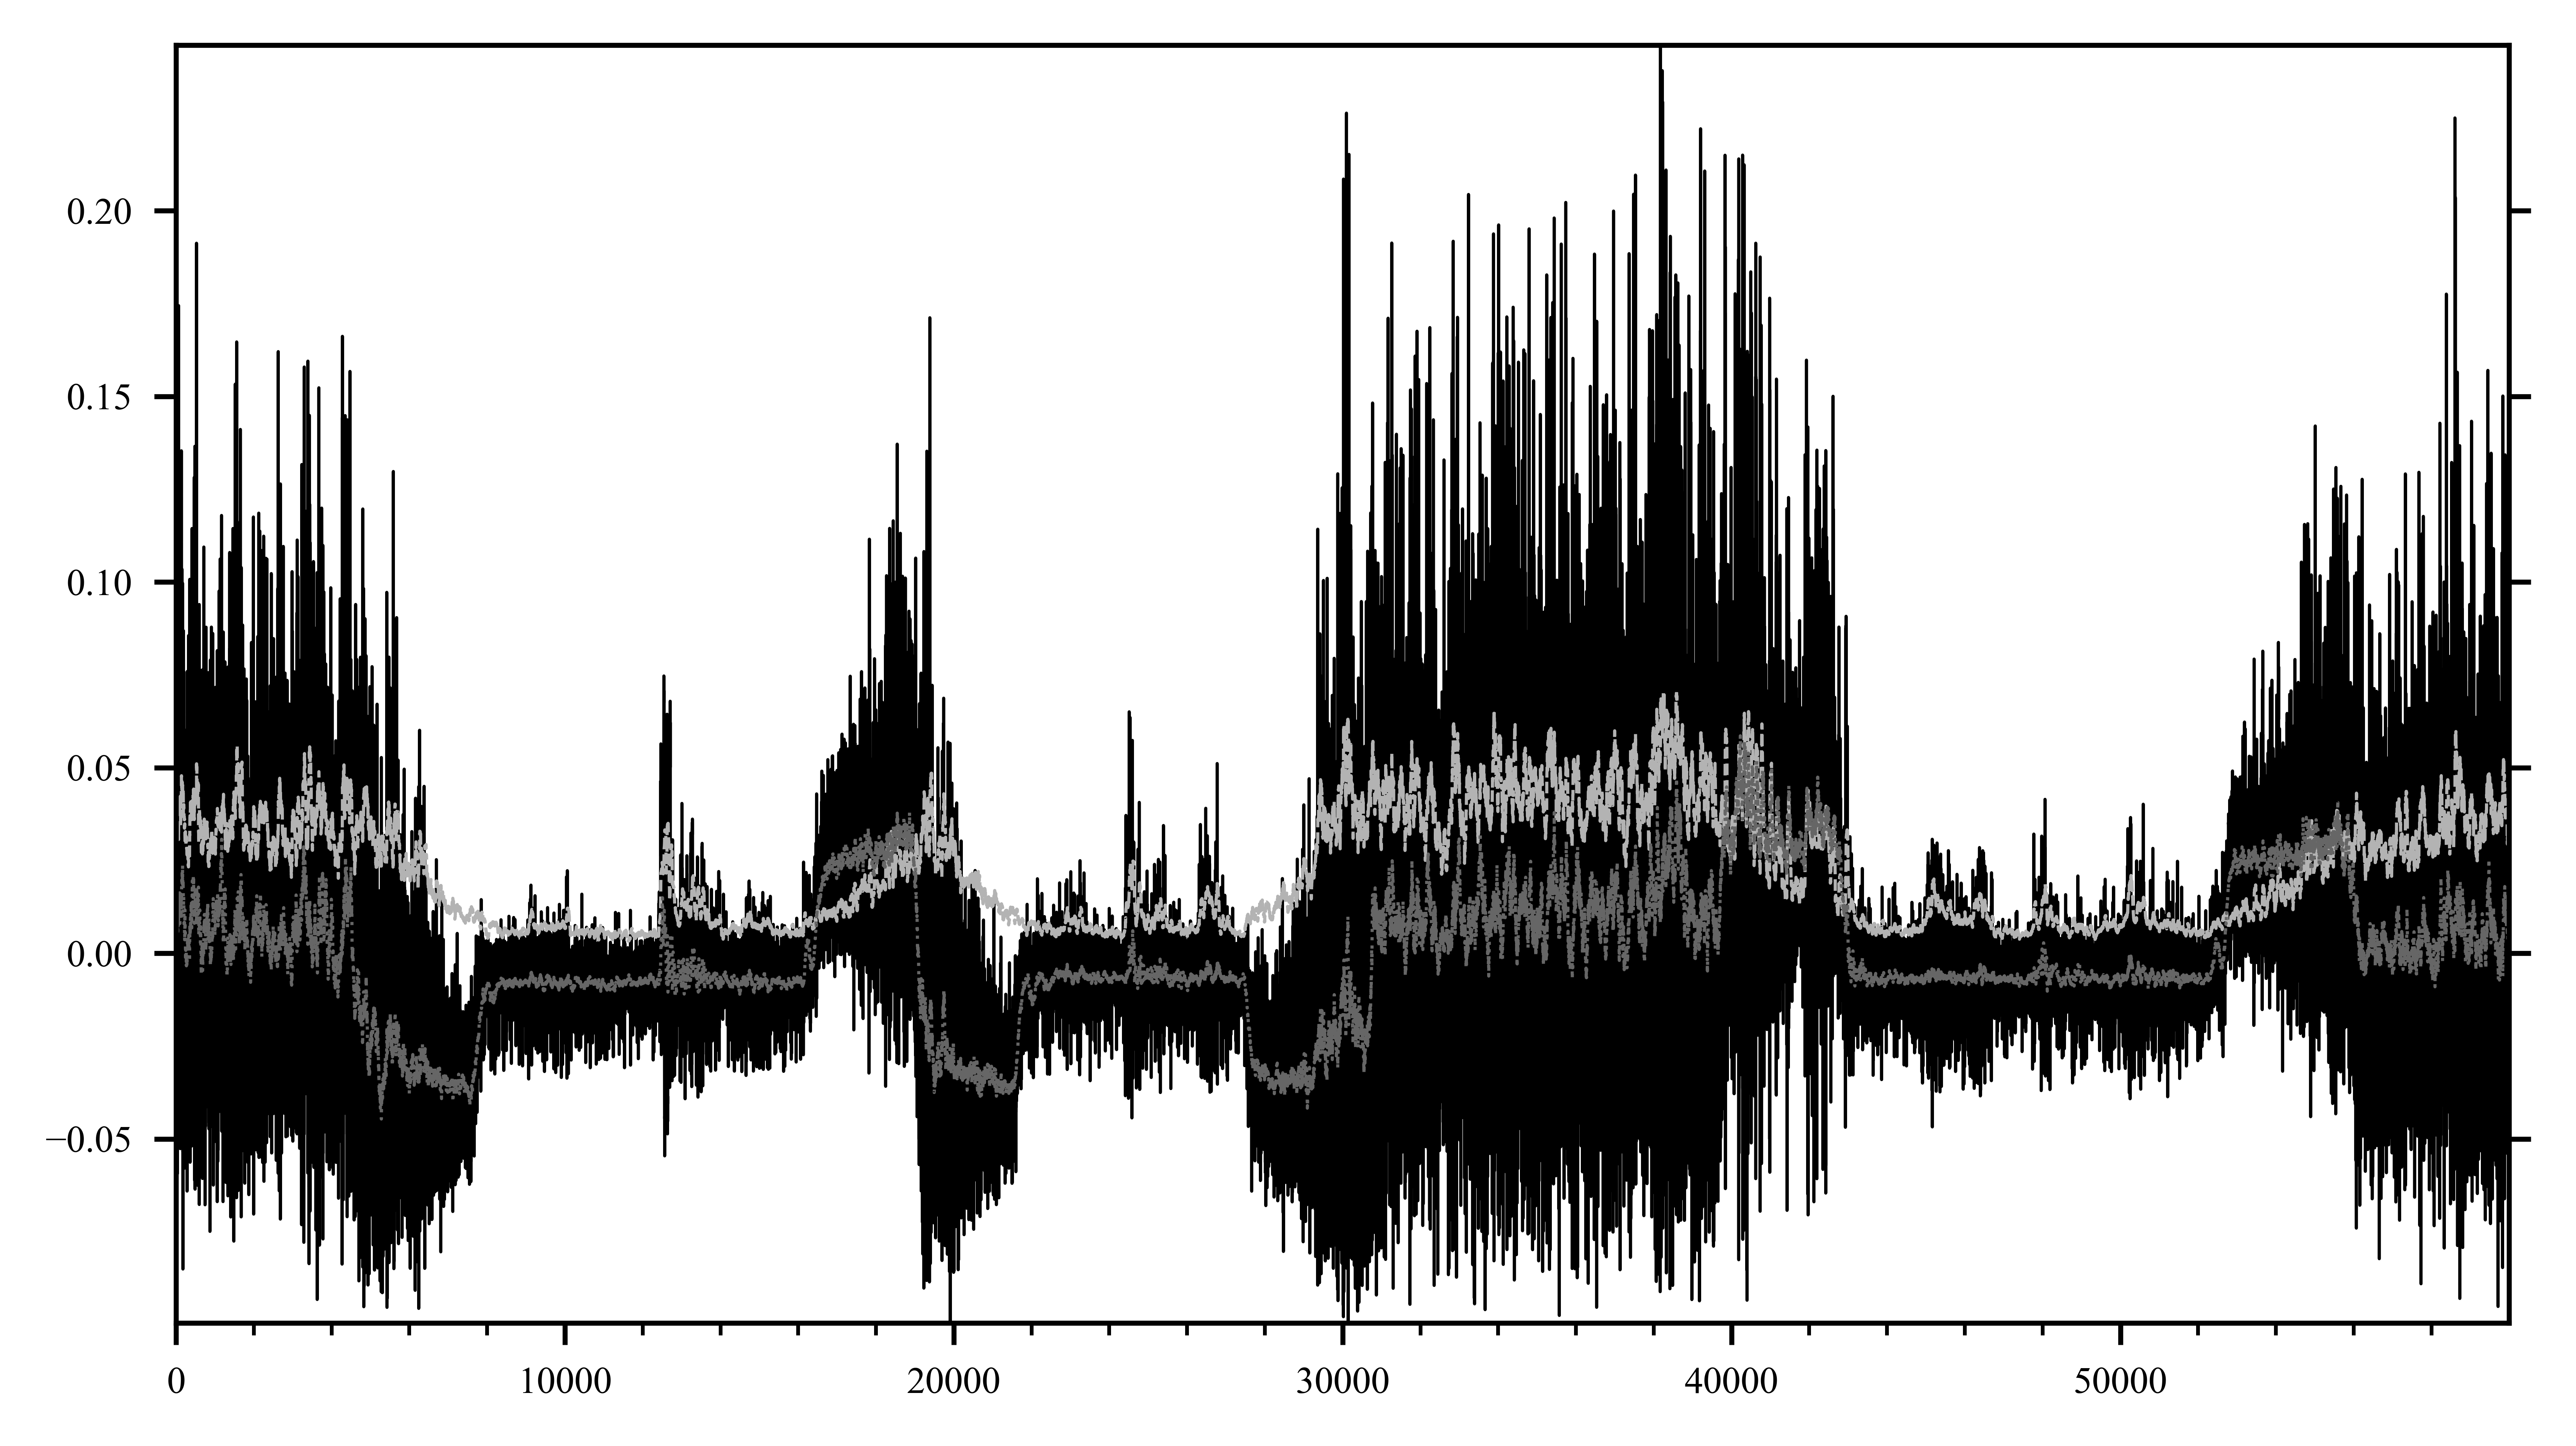

60kAccel-211011-0937.csv X 0.0 0.05857644632418301


In [14]:
# Directory = './Data'
Directory = 'C:\\Users\\Hendrickson\\Desktop\\Phone Acceleration\\3\\'
#Directory = 'C:\\Users\\dhendrickson\\Desktop\\AccelData\\home\\pi\\AccelData\\'
files = os.listdir(Directory)

#files = random.sample(files,2)

Reorder_cycler = (cycler('color', ['0.00', '0.70', '0.40', '0.90']) + cycler(linestyle=['-', '--', ':', '-.']))
plt.rc('axes', prop_cycle=Reorder_cycler)

start = 0
end = 60000

#start = 37000
#end = 42000

size = 5000
Arange = 50
coord = 2

Saving = True
location = Directory
Titles = False

for Filename in files:
    if Filename[-4:] ==  '.csv':
        ODataSet = np.genfromtxt(open(Directory+'/'+Filename,'r'), delimiter=',',skip_header=0)
        ODataSet = ODataSet[:,1:5]
        length = np.shape(ODataSet)[0]

        SmoothDataSet = np.zeros(np.shape(ODataSet)[0])
        TdDataSet = np.zeros(np.shape(ODataSet)[0])

        results =[]

        #for i in range(int(length/size)):
        for i in range(1):
            StdDev = np.zeros(length)
            StdDevSmooth = np.zeros(length)
            coord = i+1
            
            SmoothDataSet[0] = 0
            StdDev[0]=0
            StdDevSmooth[0]=0

            factor = np.average(np.power(np.power(ODataSet[:,1],2)+np.power(ODataSet[:,2],2),0.5))

            TdDataSet[0] = np.sqrt(ODataSet[0,1]**2+ODataSet[0,2]**2)-factor
            TdDataSet[1] = np.sqrt(ODataSet[1,1]**2+ODataSet[1,2]**2)-factor
            for j in range(Arange-1):
                k = j+2
                TdDataSet[k] = np.sqrt(ODataSet[k,1]**2+ODataSet[k,2]**2)-factor
            for j in range(length-Arange):
                k = (length-1)-j
                TdDataSet[k] = np.sqrt(ODataSet[k,1]**2+ODataSet[k,2]**2)-factor
            for j in range(Arange-1):
                k = j+2
                #SmoothDataSet[k,coord] = np.average(ODataSet[0:k,coord])
                #StdDev[k]=st.stdev(ODataSet[0:k,coord])
                StdDevSmooth[k] = st.stdev(TdDataSet[0:k])
                SmoothDataSet[k] = np.average(TdDataSet[0:k])
            for j in range(length-Arange):
                k = (length-1)-j
                #SmoothDataSet[k,coord] = np.average(ODataSet[k-Arange:k,coord])
                #StdDev[k]=st.stdev(ODataSet[k-Arange:k,coord])
                StdDevSmooth[k]=st.stdev(TdDataSet[k-Arange:k])
                SmoothDataSet[k] = np.average(TdDataSet[k-Arange:k])
            fig=plt.figure(figsize=(6.67,3.75))
            #plt.plot(ODataSet[start:end,coord], label = 'Original ' + Header[coord])
            plt.plot(TdDataSet[start:end]) #, label = 'Smoothed Signal')
            plt.plot(StdDevSmooth[start:end]) #,label = 'StdDev of signal')
            plt.plot(SmoothDataSet[start:end]) #, label = 'Smoothed Signal')
            
            title = Filename + ' ' + Header[coord]
            if Ledgends: plt.legend()
            if Titles: plt.title(title)
            if Saving: plt.savefig(location+title.replace(" ", "").replace(":", "").replace(",", "")+FFormat)
            plt.show()
            print(title,max(StdDev),max(SmoothDataSet[start:end]))
        #results.append([np.average(DataSet[:,1][i*size:(i+1)*size]), np.average(DataSet[:,2][i*size:(i+1)*size]),np.average(DataSet[:,3][i*size:(i+1)*size])])

        #results = np.matrix(results)
        #df = pd.DataFrame(data=results.astype('float'))
        #df.to_csv('C:\\Users\\dhendrickson\\Desktop\\Phone Acceleration\\Gyro-output-' + Filename[10:20] + '.csv', sep=',', header=False, float_format='%.8f')
        #PlotFingerPrint(DataSet[:,coord][start:end],'a',title,'coif1')

Saving = False
Titles = True

In [21]:
np.meshgrid(np.arange(0,np.shape(TdDataSet[start:end])[0]-2*1000,1),np.linspace(1,1000,1000)) 

[array([[    0,     1,     2, ..., 13997, 13998, 13999],
        [    0,     1,     2, ..., 13997, 13998, 13999],
        [    0,     1,     2, ..., 13997, 13998, 13999],
        ...,
        [    0,     1,     2, ..., 13997, 13998, 13999],
        [    0,     1,     2, ..., 13997, 13998, 13999],
        [    0,     1,     2, ..., 13997, 13998, 13999]]),
 array([[   1.,    1.,    1., ...,    1.,    1.,    1.],
        [   2.,    2.,    2., ...,    2.,    2.,    2.],
        [   3.,    3.,    3., ...,    3.,    3.,    3.],
        ...,
        [ 998.,  998.,  998., ...,  998.,  998.,  998.],
        [ 999.,  999.,  999., ...,  999.,  999.,  999.],
        [1000., 1000., 1000., ..., 1000., 1000., 1000.]])]

Directory = 'C:\\Users\\dhendrickson\\Desktop\\AccelData\\home\\pi\\AccelData\\'
Arange = 50


DataSet = np.genfromtxt(open(Directory+'/60kAccel-210812-0727.csv','r'), delimiter=',',skip_header=4)
DataSet = DataSet[:,1:5]
length = np.shape(DataSet)[0]
for i in range(3):
    StdDev = np.zeros(length)
    DataAvgs = np.zeros((length,4))
    coord = i+1
    for j in range(length-Arange):
        k = (length-1)-j
        #DataAvgs[:,coord][k] = np.average(DataSet[:,coord][k-Arange:k])
        StdDev[k]=st.stdev(DataSet[:,coord][k-Arange:k])

In [22]:
#trys = ['coif1','coif2','mexh','gaus2','dmey','gaus1','morl','cgau1','cgau2','db1','db2','sym1','sym2','sym3']
#trys = ['coif2','mexh','gaus2','db1','sym2']
trys = ['gaus1'] #,'gaus1','gaus2','gaus3','gaus5']

Titles = False
Saving = True

start = 27000
end = 43000
coord = 1
scales = 1000
slices = 10
trim = 1000

#for segmenets in range(24):
#    start = segmenets * 2500
#    end = start + 5000
#for id in trys:
    #try:
#        for cord in range(1):
#           coord = cord + 1
            #PlotFingerPrint(ODataSet[start:end,coord],'a','Raw data from '+str(start)+' to '+str(end),id,scales,slices,trim)
            #PlotFingerPrint(SmoothDataSet[start:end,coord],'a','Smoothed data from '+str(start)+' to '+str(end),id,scales,slices,trim)
            #PlotFingerPrint(StdDev[start:end],'a',id + 'StdDev from '+str(start)+' to '+str(end),id,scales,slices,trim)
            #PlotFingerPrint(StdDevSmooth[start:end],'a',id + 'Wavelet from '+str(start)+' to '+str(end),id,500,5)
#            PlotFingerPrint(TdDataSet[start:end],'a',id + 'Wavelet on r series from '+str(start)+' to '+str(end),id,500,5)
#            PlotFingerPrint(SmoothDataSet[start:end],'a','Smoothed r data from '+str(start)+' to '+str(end),id,scales,slices,trim)
            
    #except:
#        print(id)

In [25]:
FpScat = fp.getLabeledThumbprint(TdDataSet[start:end], 'gaus2',scales,slices)

In [29]:
np.shape(FpScat[:,trim:-trim])

(1000, 14000)

TypeError: Input z must be at least a (2, 2) shaped array, but has shape (1000, 0)

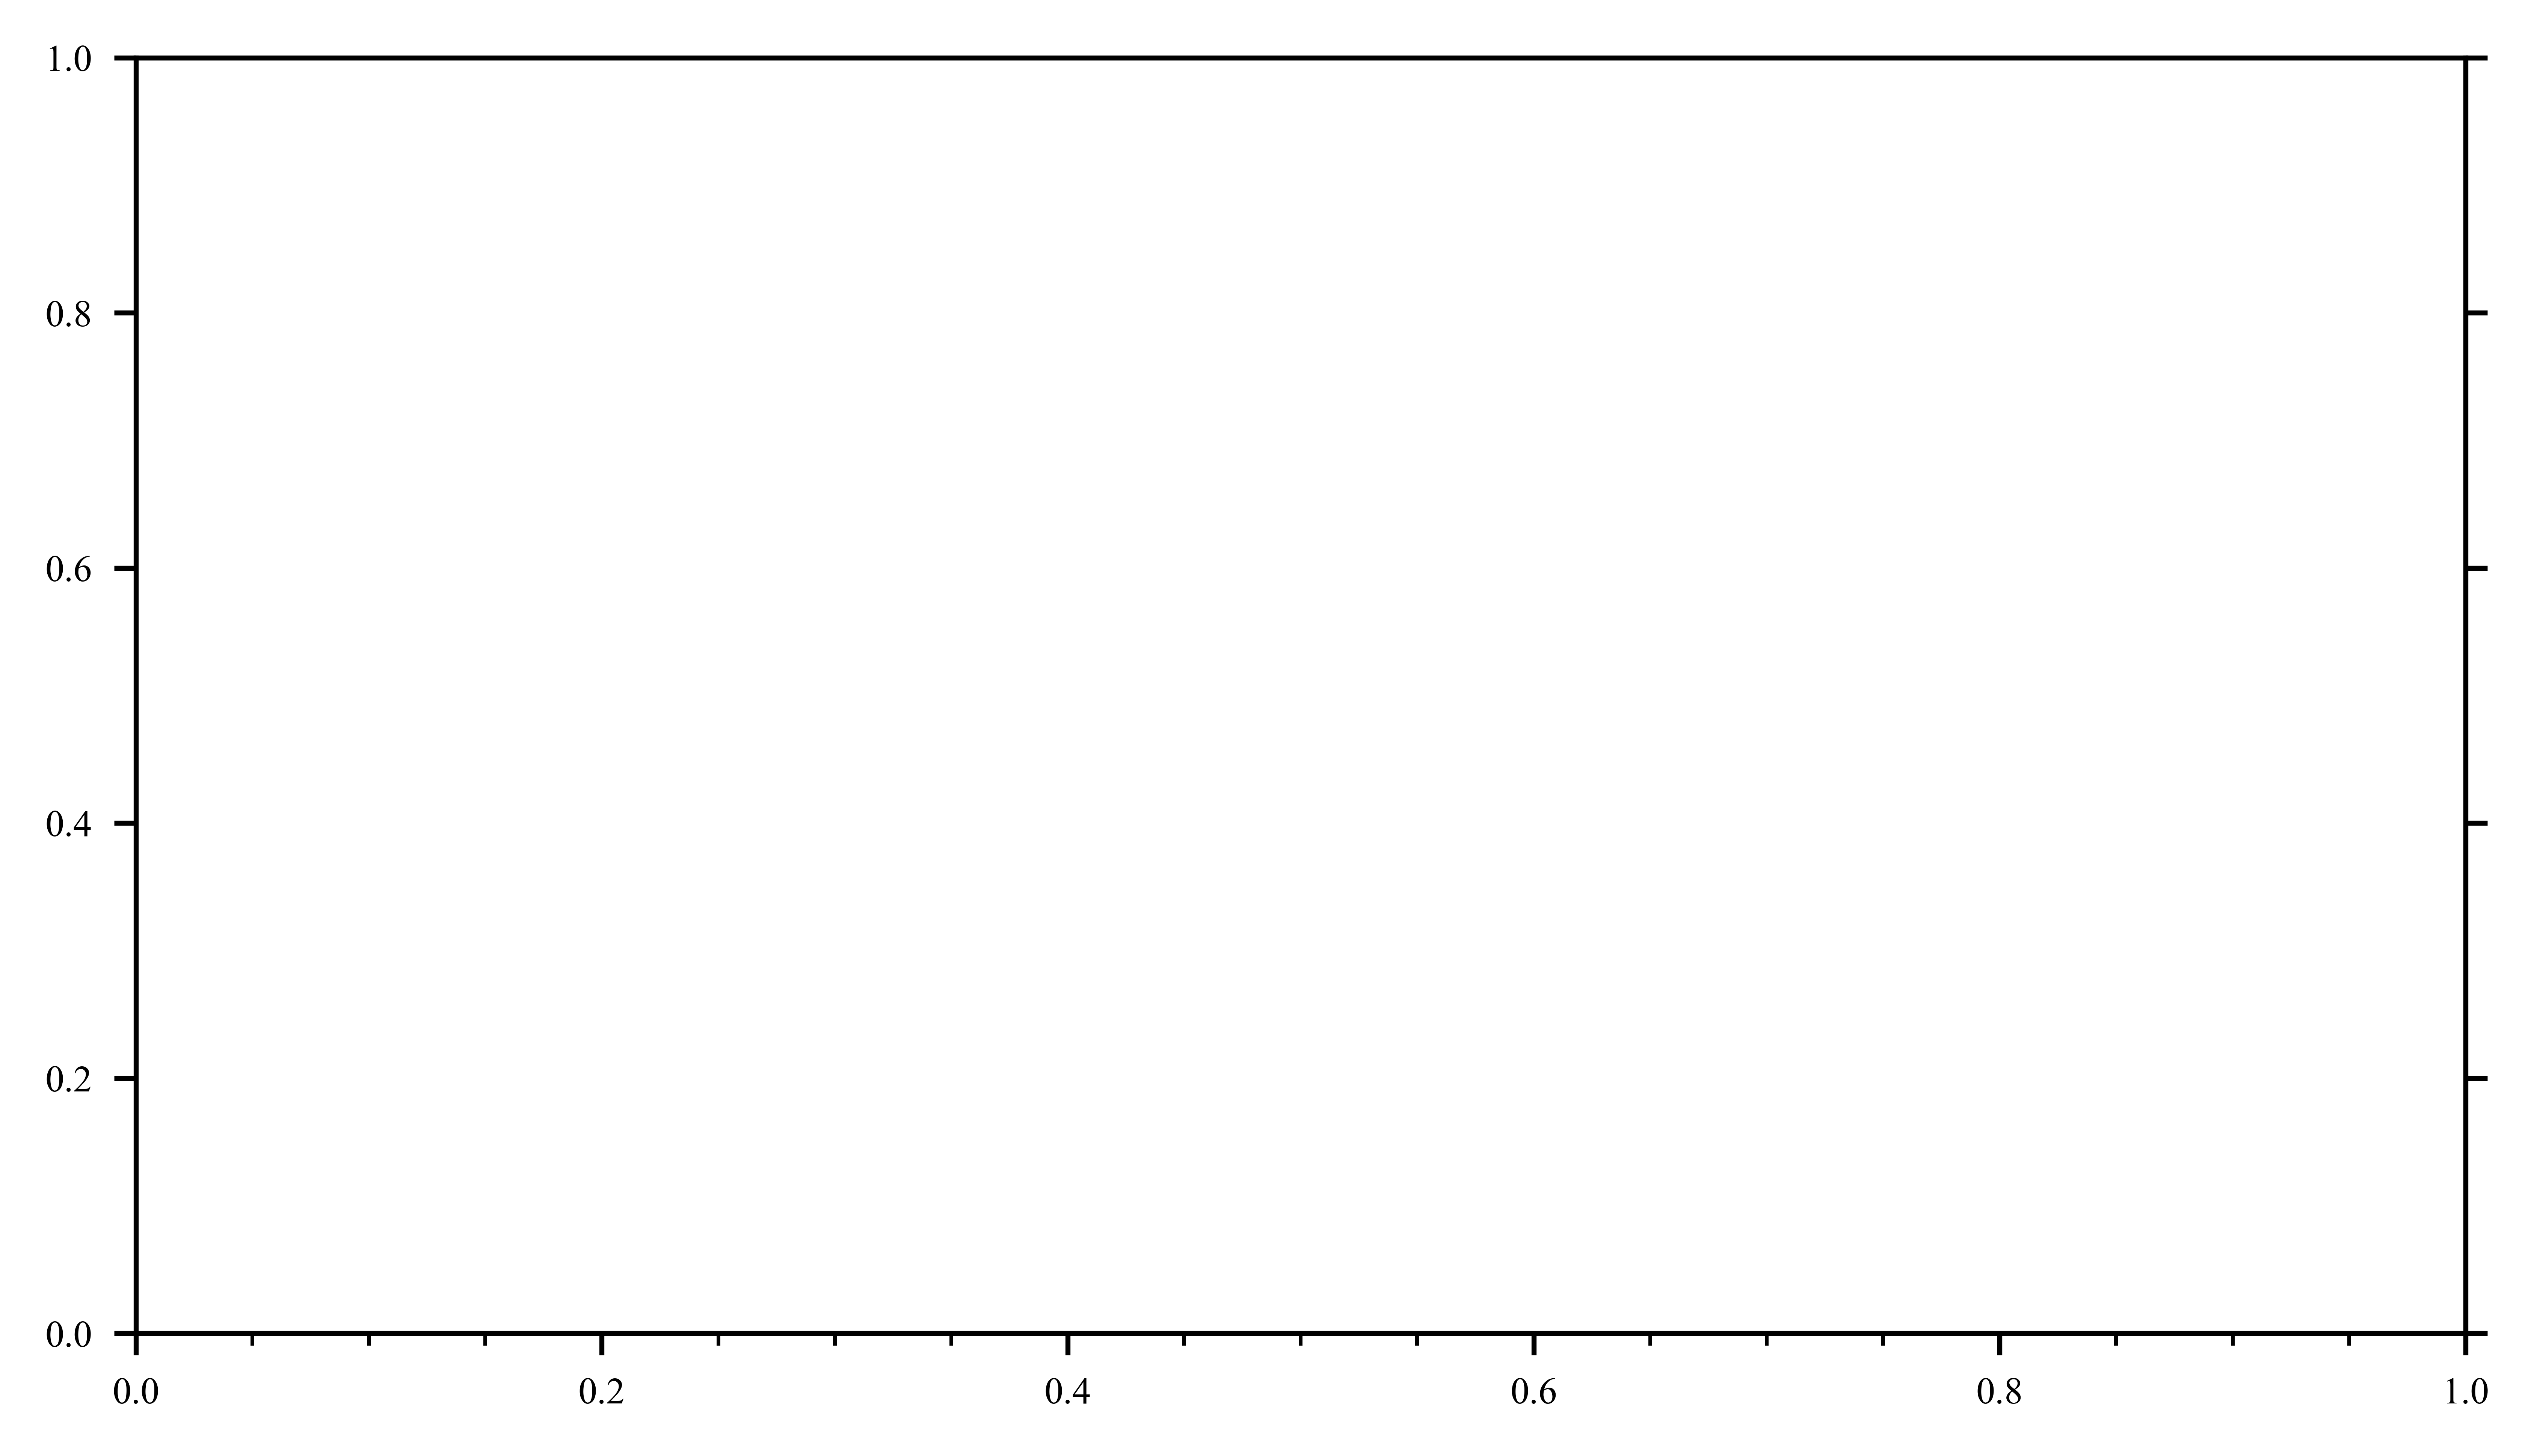

In [26]:
PlotFingerPrint(FpScat,'a',id + 'Wavelet on r series from '+str(start)+' to '+str(end),id,500,5)

In [ ]:
FpScat = fp.getLabeledThumbprint(SmoothDataSet[start:end], 'gaus2',scales,slices)

In [ ]:
PlotFingerPrint(FpScat,'a','Smoothed r data from '+str(start)+' to '+str(end),id,scales,slices,trim)